<a href="https://colab.research.google.com/github/4hmetcakmak/PythonDataScienceHandbook/blob/master/ClassActivityWeek_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK-8A: Please develop a Naive Bayesian Classification model (via sklearn) with the dataset on the wikipedia page (4 males and 4 females) to predict the class (male or female) of the given sample (the single case). Please present the probabilities of each class as well using the predict_proba function. 

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/gb_genders.csv")
dummy=pd.get_dummies(df["Person"])
df=pd.concat((dummy,df),axis=1)
df=df.drop(["male", "Person"],axis=1)
df=df.rename(columns={"female":"Gender"}) #0 =male      1=female
x=np.asarray(df.drop(["Gender"],axis=1)) #data
y=np.asarray(df["Gender"]) #Target

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y,
                                                random_state=0, train_size=0.7, test_size=0.3)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(Xtrain,ytrain);
y_model=model.predict(Xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.6666666666666666

In [ ]:
xnew=np.array([[6,130,8]]) #burada çıktıya şaşırdım hocam 
ynew=model.predict(xnew)
print(ynew)
yproba=model.predict_proba(xnew)
yproba[:].round(2)

[1]


array([[0., 1.]])

TASK-8B: Please provide 3d illustrations of the dataset with respect to the given 3 features/dimensions. Please also color different classes (male and female) in your visualization. 

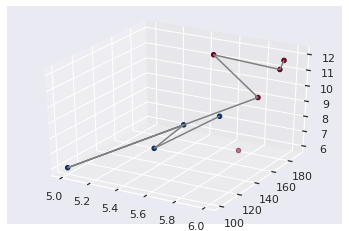

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot( projection='3d')
height=x[:,0]
weight=x[:,1]
foot_size=x[:,2]
ax.plot3D(height, weight,foot_size, "gray")
ax.scatter3D(height, weight,foot_size, c=y,cmap="RdBu",alpha=1)
h1=xnew[:,0]
w1=xnew[:,1]
f1=xnew[:,2]
ax.scatter3D(h1,w1,f1,c=ynew,cmap="RdBu",alpha=0.5);